# Problam Statment

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [62]:
#import importent library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
#load data set
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# About dataset

1. This data set has 1470 rows and 35 columns.
2. In this dataset Attrition column is target column. 
3. All other columns are features.

# Some basic information gain about dataset

In [65]:
#shape of data
df.shape

(1470, 35)

In [66]:
#chacking null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Some of the column is not importent for modal, so we have to drop those columns

In [67]:
#droping not useful columns.
df = df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])

In [75]:
#all columns od dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [95]:
#saprate data set into objective, continues and catagorical
df_objective = df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].copy()
df_numerical = df.drop(columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition'])

In [96]:
df_target = df['Attrition']

1. Objective => df_objective
2. Numerical => df_numerial
3. target    => df_target

In [97]:
df_numerical.shape

(1470, 23)

# Now deal with numerical data

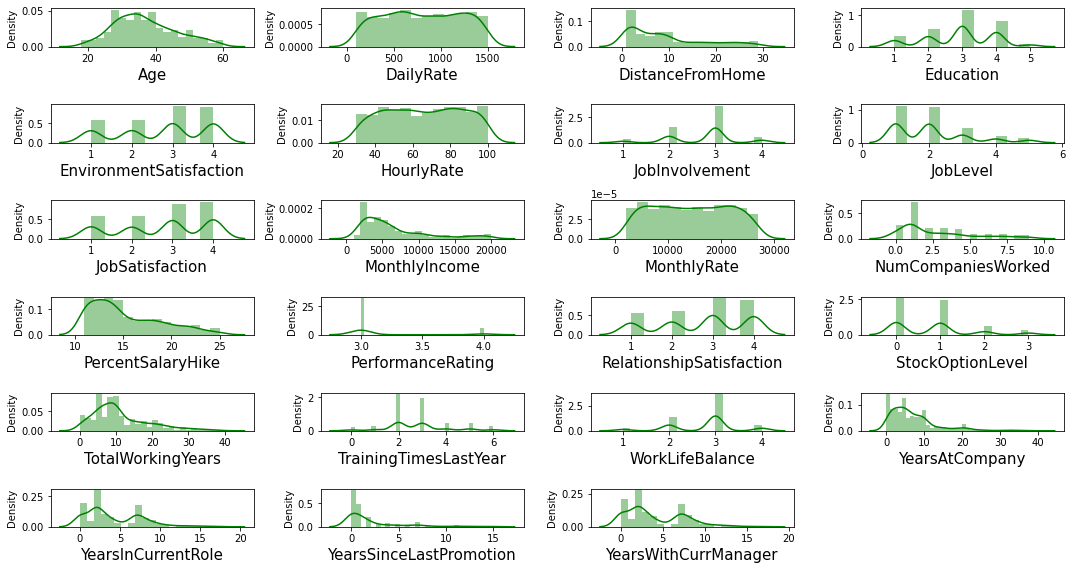

In [108]:
plt.figure(figsize=(15,8),facecolor='white')
plot = 1
for column in df_numerical:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.distplot(df_numerical[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

In [116]:
#lets saparate continues and catagorical data set
df_continues = df_numerical[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole']].copy()
df_categorical =df_numerical[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']].copy()

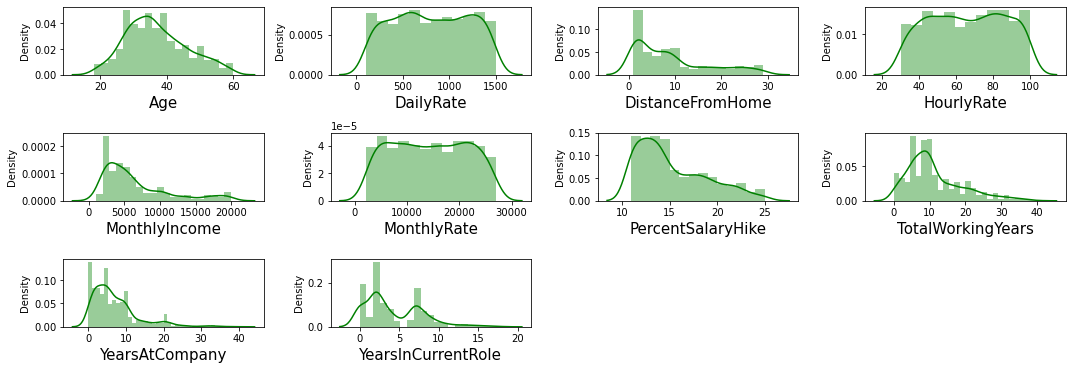

In [118]:
#now chack distribution of continues dataset
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for column in df_continues:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.distplot(df_continues[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

# chacking outliers

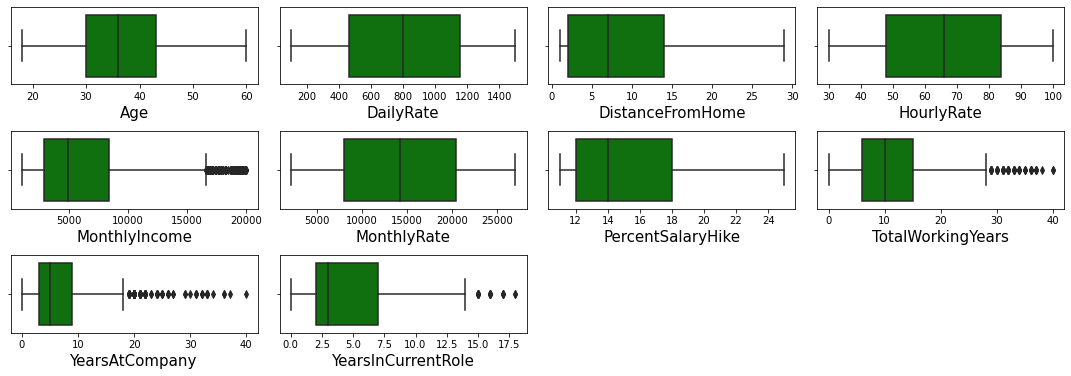

In [119]:
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for column in df_continues:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.boxplot(df_continues[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

some columns has outliers so i use IQR method for removing outlier.

In [123]:
#chaking skewness.
df_continues.skew().sort_values(ascending=False)

MonthlyIncome         0.861960
PercentSalaryHike     0.655412
YearsAtCompany        0.426835
Age                   0.413286
DistanceFromHome      0.398114
TotalWorkingYears     0.176358
MonthlyRate           0.018578
DailyRate            -0.003519
HourlyRate           -0.032311
YearsInCurrentRole   -0.254344
dtype: float64

In [124]:
#Skewness removing.
for index in df_continues.skew().index:
    if df_continues.skew().loc[index]>0.5:
        df_continues[index] = np.sqrt(df_continues[index])
    if df_continues.skew().loc[index]<-0.5:
        df_continues[index] = np.cbrt(df_continues[index])

In [126]:
df_continues.skew().sort_values(ascending=False)

MonthlyIncome         0.581938
PercentSalaryHike     0.574371
YearsAtCompany        0.426835
Age                   0.413286
DistanceFromHome      0.398114
TotalWorkingYears     0.176358
MonthlyRate           0.018578
DailyRate            -0.003519
HourlyRate           -0.032311
YearsInCurrentRole   -0.254344
dtype: float64

In [127]:
for index in df_continues.skew().index:
    if df_continues.skew().loc[index]>0.5:
        df_continues[index] = np.sqrt(df_continues[index])
    if df_continues.skew().loc[index]<-0.5:
        df_continues[index] = np.cbrt(df_continues[index])

In [129]:
df_continues.skew().sort_values(ascending=False)

PercentSalaryHike     0.534312
MonthlyIncome         0.436064
YearsAtCompany        0.426835
Age                   0.413286
DistanceFromHome      0.398114
TotalWorkingYears     0.176358
MonthlyRate           0.018578
DailyRate            -0.003519
HourlyRate           -0.032311
YearsInCurrentRole   -0.254344
dtype: float64

In [130]:
for index in df_continues.skew().index:
    if df_continues.skew().loc[index]>0.5:
        df_continues[index] = np.sqrt(df_continues[index])
    if df_continues.skew().loc[index]<-0.5:
        df_continues[index] = np.cbrt(df_continues[index])

In [132]:
df_continues.skew().sort_values(ascending=False)

PercentSalaryHike     0.514400
MonthlyIncome         0.436064
YearsAtCompany        0.426835
Age                   0.413286
DistanceFromHome      0.398114
TotalWorkingYears     0.176358
MonthlyRate           0.018578
DailyRate            -0.003519
HourlyRate           -0.032311
YearsInCurrentRole   -0.254344
dtype: float64

Skewness has been removed.

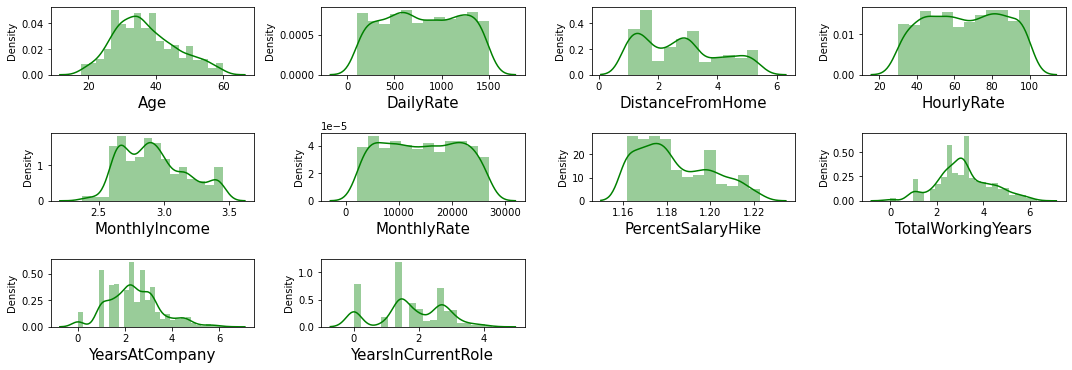

In [136]:
#chaking distribution
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for column in df_continues:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.distplot(df_continues[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

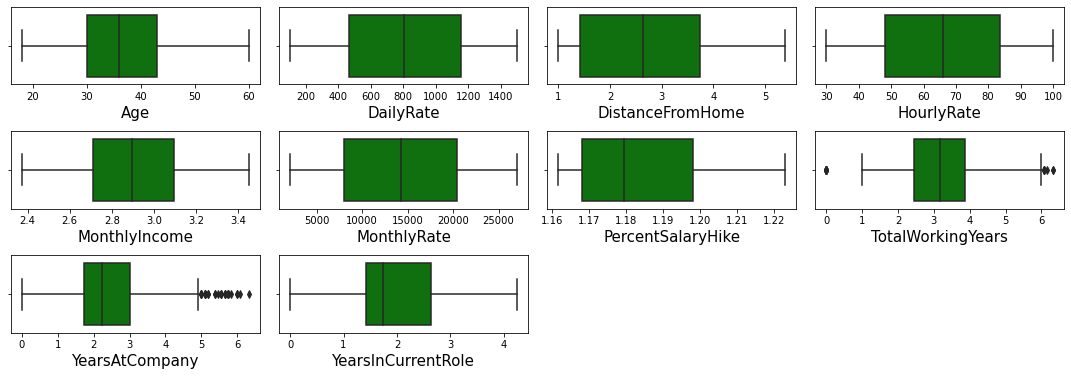

In [138]:
#boxplot for chaking outlier.
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for column in df_continues:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.boxplot(df_continues[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

As we can see that. in column YearAtCompany and TotelWorkingYear has some outliers.

In [142]:
#iqr technic.
q1 = df_continues.quantile(0.25)
q3 = df_continues.quantile(0.75)
iqr = q3-q1

In [144]:
high = q3.YearsAtCompany + (iqr.YearsAtCompany*1.50)
print(high)
index = np.where(df_continues['YearsAtCompany']>high)
print(index)

4.901923788646684
(array([  18,   62,   98,  119,  126,  190,  237,  270,  390,  411,  425,
        473,  477,  561,  592,  595,  653,  677,  749,  861,  914,  918,
        922,  962, 1086, 1111, 1116, 1135, 1138], dtype=int64),)


In [145]:
#drop this data
df_continues = df_continues.drop(index=[18,   62,   98,  119,  126,  190,  237,  270,  390,  411,  425, 473,  477,  561,  592,  595,  653,  677,  749,  861,  914,  918,922,  962, 1086, 1111, 1116, 1135, 1138])

In [148]:
df_continues.reset_index()

,index,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,0,41,1102,1.000000,94,2.966235,19479,1.161681,2.828427,2.449490,2.000000
1,1,49,279,2.828427,61,2.909140,24907,1.216488,3.162278,3.162278,2.645751
2,2,37,1373,1.414214,92,2.600269,2396,1.184420,2.645751,0.000000,0.000000
3,3,33,1392,1.732051,56,2.709992,23159,1.161681,2.828427,2.828427,2.645751
4,4,27,591,1.414214,40,2.770192,16632,1.168016,2.449490,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...
1436,1465,36,884,4.795832,41,2.668473,12290,1.193722,4.123106,2.236068,1.414214
1437,1466,39,613,2.449490,42,3.161922,21457,1.184420,3.000000,2.645751,2.645751
1438,1467,27,155,2.000000,87,2.975355,5174,1.205909,2.449490,2.449490,1.414214
1439,1468,49,1023,1.414214,63,2.927174,13243,1.179324,4.123106,3.000000,2.449490


In [149]:
#drop index from other datasets
df_categorical = df_categorical.drop(index=[18,   62,   98,  119,  126,  190,  237,  270,  390,  411,  425, 473,  477,  561,  592,  595,  653,  677,  749,  861,  914,  918,922,  962, 1086, 1111, 1116, 1135, 1138])
df_objective = df_objective.drop(index=[18,   62,   98,  119,  126,  190,  237,  270,  390,  411,  425, 473,  477,  561,  592,  595,  653,  677,  749,  861,  914,  918,922,  962, 1086, 1111, 1116, 1135, 1138])
df_target = df_target.drop(index=[18,   62,   98,  119,  126,  190,  237,  270,  390,  411,  425, 473,  477,  561,  592,  595,  653,  677,  749,  861,  914,  918,922,  962, 1086, 1111, 1116, 1135, 1138])

In [150]:
#reset index
df_categorical.reset_index()

,index,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,0,2,2,3,2,4,8,3,1,0,0,1,0,5
1,1,1,3,2,2,2,1,4,4,1,3,3,1,7
2,2,2,4,2,1,3,6,3,2,0,3,3,0,0
3,3,4,4,3,1,3,1,3,3,0,3,3,3,0
4,4,1,1,3,1,2,9,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1465,2,3,4,2,4,4,3,3,1,3,3,0,3
1437,1466,1,4,2,3,1,4,3,1,1,5,3,1,7
1438,1467,3,2,4,2,2,1,4,2,1,0,3,0,3
1439,1468,3,4,2,2,2,2,3,4,0,3,2,0,8


In [151]:
df_objective.reset_index()

,index,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1436,1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1437,1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1438,1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1439,1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [152]:
df_target.reset_index()

,index,Attrition
0,0,Yes
1,1,No
2,2,Yes
3,3,No
4,4,No
...,...,...
1436,1465,No
1437,1466,No
1438,1467,No
1439,1468,No


In [154]:
high = q3.TotalWorkingYears + (iqr.TotalWorkingYears*1.50)
print(high)
index = np.where(df_continues['TotalWorkingYears']>high)
print(index)

6.008223751343776
(array([  83,  434, 1272], dtype=int64),)


In [155]:
low = q1.TotalWorkingYears - (iqr.TotalWorkingYears*1.50)
print(low)
index = np.where(df_continues['TotalWorkingYears']<low)
print(index)

0.31424933764681917
(array([  22,  122,  288,  293,  446,  599,  709,  809,  948, 1124, 1282],
      dtype=int64),)


In [156]:
df_continues = df_continues.drop(index=[83,434,1272,22,  122,  288,  293,  446,  599,  709,  809,  948, 1124, 1282])
df_categorical = df_categorical.drop(index=[83,434,1272,22,  122,  288,  293,  446,  599,  709,  809,  948, 1124, 1282])
df_objective = df_objective.drop(index=[83,434,1272,22,  122,  288,  293,  446,  599,  709,  809,  948, 1124, 1282])
df_target = df_target.drop(index=[83,434,1272,22,  122,  288,  293,  446,  599,  709,  809,  948, 1124, 1282])

In [157]:
df_continues.reset_index()

,index,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,0,41,1102,1.000000,94,2.966235,19479,1.161681,2.828427,2.449490,2.000000
1,1,49,279,2.828427,61,2.909140,24907,1.216488,3.162278,3.162278,2.645751
2,2,37,1373,1.414214,92,2.600269,2396,1.184420,2.645751,0.000000,0.000000
3,3,33,1392,1.732051,56,2.709992,23159,1.161681,2.828427,2.828427,2.645751
4,4,27,591,1.414214,40,2.770192,16632,1.168016,2.449490,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...
1422,1465,36,884,4.795832,41,2.668473,12290,1.193722,4.123106,2.236068,1.414214
1423,1466,39,613,2.449490,42,3.161922,21457,1.184420,3.000000,2.645751,2.645751
1424,1467,27,155,2.000000,87,2.975355,5174,1.205909,2.449490,2.449490,1.414214
1425,1468,49,1023,1.414214,63,2.927174,13243,1.179324,4.123106,3.000000,2.449490


In [158]:
df_categorical.reset_index()

,index,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,0,2,2,3,2,4,8,3,1,0,0,1,0,5
1,1,1,3,2,2,2,1,4,4,1,3,3,1,7
2,2,2,4,2,1,3,6,3,2,0,3,3,0,0
3,3,4,4,3,1,3,1,3,3,0,3,3,3,0
4,4,1,1,3,1,2,9,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1465,2,3,4,2,4,4,3,3,1,3,3,0,3
1423,1466,1,4,2,3,1,4,3,1,1,5,3,1,7
1424,1467,3,2,4,2,2,1,4,2,1,0,3,0,3
1425,1468,3,4,2,2,2,2,3,4,0,3,2,0,8


In [159]:
df_objective.reset_index()

,index,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1422,1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1423,1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1424,1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1425,1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [160]:
df_target.reset_index()

,index,Attrition
0,0,Yes
1,1,No
2,2,Yes
3,3,No
4,4,No
...,...,...
1422,1465,No
1423,1466,No
1424,1467,No
1425,1468,No


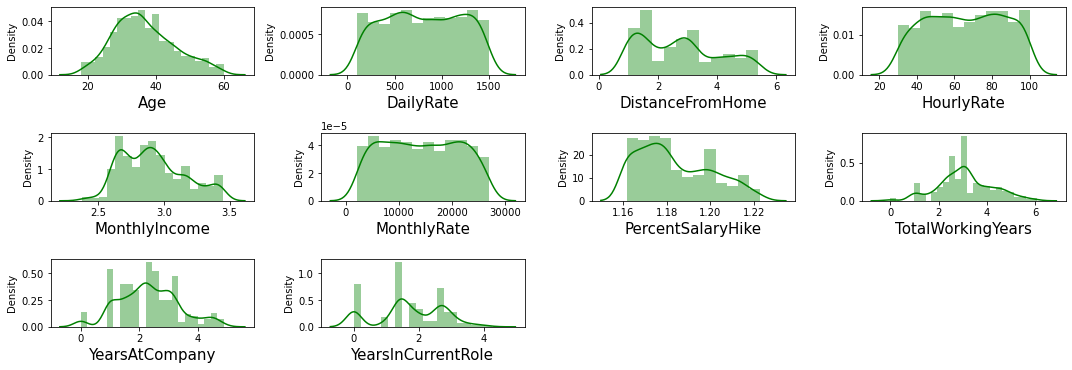

In [164]:
#again chaking outliers
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for column in df_continues:
    if plot < 24:
        plt.subplot(6,4,plot)
        sns.distplot(df_continues[column],color='green')
        plt.xlabel(column,fontsize=15)
    plot+=1
plt.tight_layout()

In [198]:
df_target = df_target.replace({"Yes":1,"No":0})

# Now add all dataset of features

In [205]:
df_final = df_continues.join([df_categorical,df_objective])

In [209]:
df_final.head(10)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1.000000,94,2.966235,19479,1.161681,2.828427,2.449490,2.000000,...,1,0,5,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,279,2.828427,61,2.909140,24907,1.216488,3.162278,3.162278,2.645751,...,3,1,7,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,1373,1.414214,92,2.600269,2396,1.184420,2.645751,0.000000,0.000000,...,3,0,0,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,1392,1.732051,56,2.709992,23159,1.161681,2.828427,2.828427,2.645751,...,3,3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,591,1.414214,40,2.770192,16632,1.168016,2.449490,1.414214,1.414214,...,3,2,2,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,32,1005,1.414214,79,2.728079,11864,1.173874,2.828427,2.645751,2.645751,...,2,3,6,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,59,1324,1.732051,81,2.681106,9964,1.205909,3.464102,1.000000,0.000000,...,2,0,0,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,30,1358,4.898979,67,2.683982,13335,1.213113,1.000000,1.000000,0.000000,...,3,0,0,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,38,216,4.795832,44,3.143141,8787,1.209591,3.162278,3.000000,2.645751,...,3,1,8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,36,1299,5.196152,94,2.916657,16577,1.173874,4.123106,2.645751,2.645751,...,2,7,7,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


# Chacking correlation

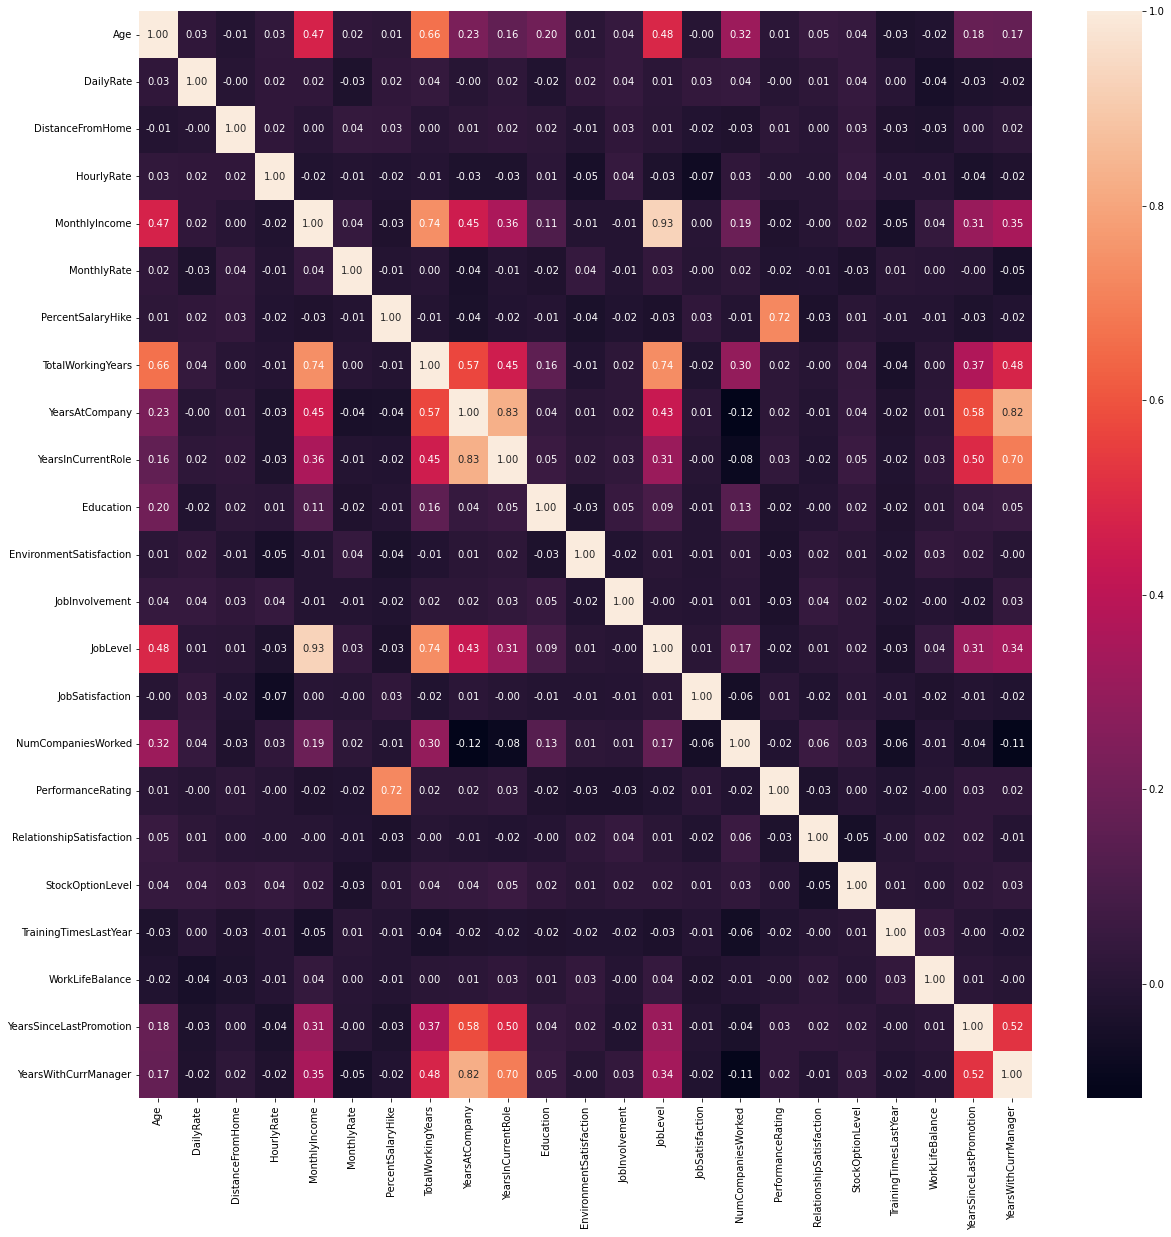

In [212]:
#heatmap
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(df_final.corr(),annot=True,fmt='.2f')
plt.show()

1. YearsInCurrentRole <=> YearsAtCompany
2. JobLevel <=> MonthlyIncome
3. YearsWithCurrManager <=> YearsAtCompany

these are correlative with each other.

Now chacking correlation with target. 

In [215]:
df_final.corrwith(df_target).sort_values(ascending=False)

DistanceFromHome            0.082081
NumCompaniesWorked          0.042630
MonthlyRate                 0.018735
PerformanceRating           0.003675
HourlyRate                 -0.003405
PercentSalaryHike          -0.019302
Education                  -0.036852
YearsSinceLastPromotion    -0.038127
RelationshipSatisfaction   -0.046386
DailyRate                  -0.051032
TrainingTimesLastYear      -0.051509
WorkLifeBalance            -0.067334
EnvironmentSatisfaction    -0.107256
JobSatisfaction            -0.111797
JobInvolvement             -0.128699
StockOptionLevel           -0.141443
YearsWithCurrManager       -0.154967
Age                        -0.167682
JobLevel                   -0.170720
YearsAtCompany             -0.193661
YearsInCurrentRole         -0.194157
MonthlyIncome              -0.195870
TotalWorkingYears          -0.218319
dtype: float64

In [218]:
#so we are seeing that YearsInCurrentRole,MonthlyIncome and YearsAtCompany are very less co relative with target. so drop it.
df_final = df_final.drop(columns=['YearsInCurrentRole','MonthlyIncome'])
df_final = df_final.drop(columns=['YearsAtCompany'])
df_final.shape

(1427, 27)

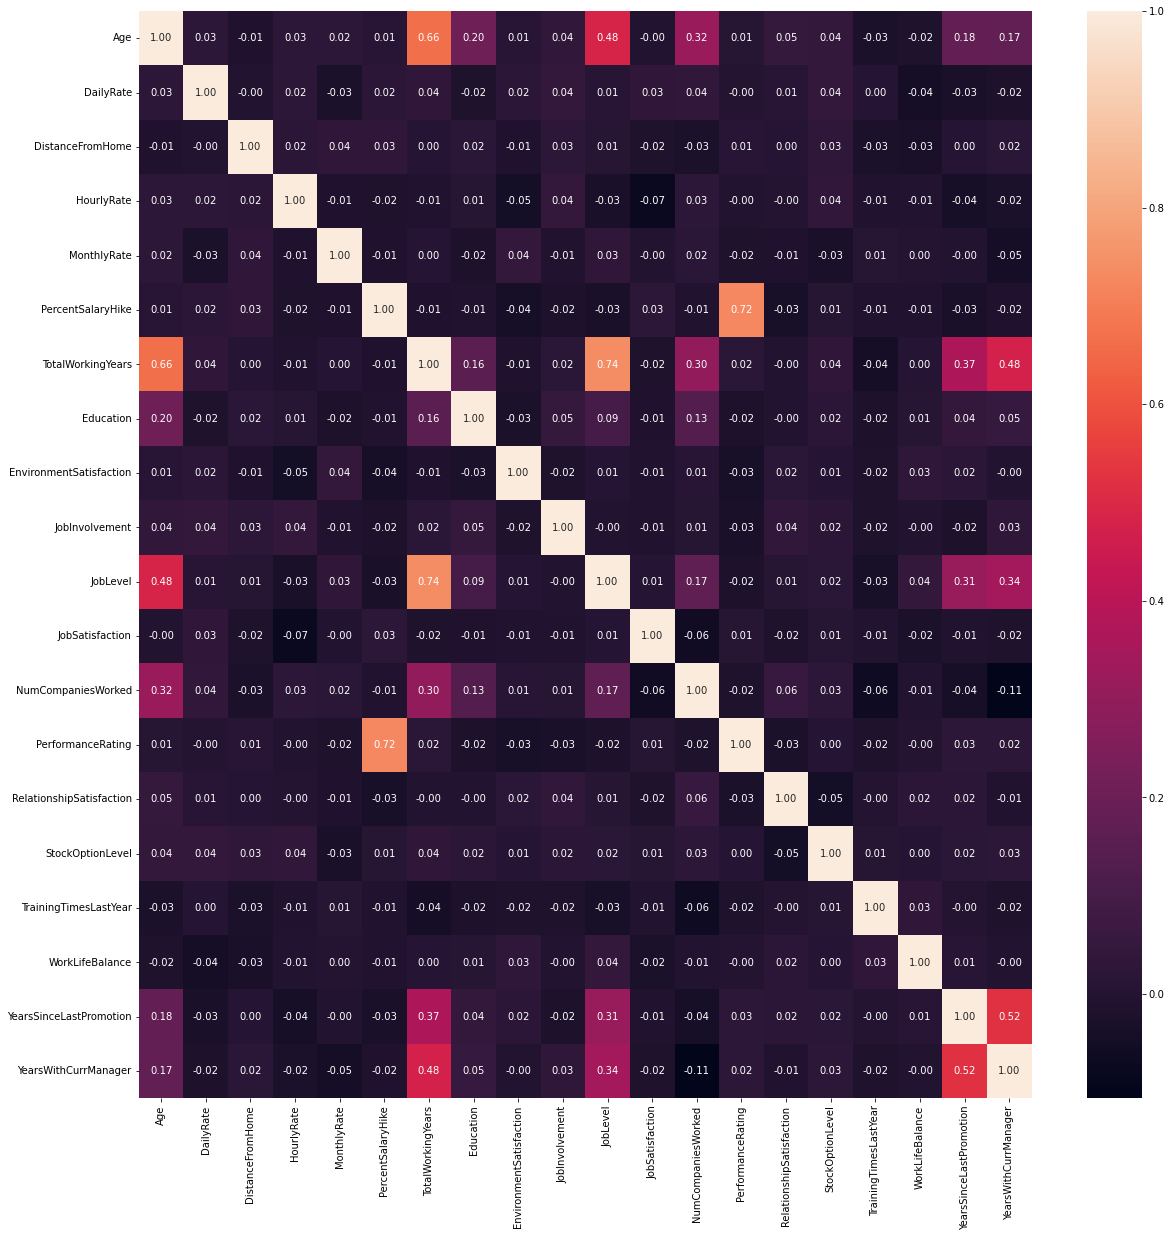

In [219]:
#again chack heatmap correlationship
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(df_final.corr(),annot=True,fmt='.2f')
plt.show()

now data looks good.

# Deal with objective data

In [222]:
df_objective.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [223]:
#using get_dummies
df_final = pd.get_dummies(data=df_final,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],drop_first=True)
df_final.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,TotalWorkingYears,Education,EnvironmentSatisfaction,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1.000000,94,19479,1.161681,2.828427,2,2,3,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.828427,61,24907,1.216488,3.162278,1,3,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.414214,92,2396,1.184420,2.645751,2,4,2,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.732051,56,23159,1.161681,2.828427,4,4,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.414214,40,16632,1.168016,2.449490,1,1,3,...,1,0,0,0,0,0,0,1,0,0


In [227]:
print("Shape of feature data is =>\n",df_final.shape)
print("Shape of target data is  =>\n",df_target.shape)

Shape of feature data is =>
 (1427, 41)
Shape of target data is  =>
 (1427,)


# Now deal with target 

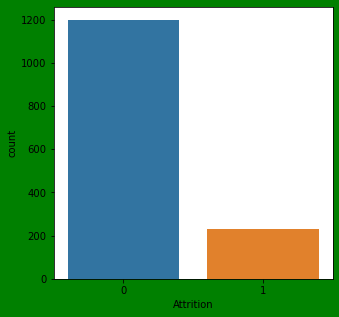

In [228]:
plt.figure(figsize=(5,5),facecolor='green')
sns.countplot(df_target)
plt.show()

# data is imbalance so need to balance first

In [229]:
from imblearn.over_sampling import SMOTE

In [234]:
over_sampling = SMOTE(0.80)
df_final,df_target = over_sampling.fit_resample(df_final,df_target,)

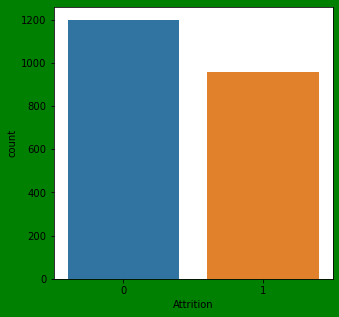

0    1198
1     958
Name: Attrition, dtype: int64


In [236]:
plt.figure(figsize=(5,5),facecolor='green')
sns.countplot(df_target)
plt.show()
print(df_target.value_counts())

In [237]:
#final chaking
print("Shape of feature data is =>",df_final.shape)
print("Shape of target data is =>",df_target.shape)

Shape of feature data is => (2156, 41)
Shape of target data is => (2156,)


# VIF

In [241]:
# Let's check the VIF Score

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scale = StandardScaler()
df_final_scale = scale.fit_transform(df_final)

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(df_final_scale,i) for i in range(df_final_scale.shape[1])]
vif["Features"] = df_final.columns
vif

,VIF Score,Features
0,2.011486,Age
1,1.048491,DailyRate
2,1.039640,DistanceFromHome
3,1.041327,HourlyRate
4,1.050789,MonthlyRate
5,1.748521,PercentSalaryHike
6,4.063349,TotalWorkingYears
7,1.096763,Education
8,1.094687,EnvironmentSatisfaction
9,1.160994,JobInvolvement


VIF score is not more then 10. so there are no multicoliniarty.

# Using PCA for best feature selection.

Number of component explained 98% variance :  35


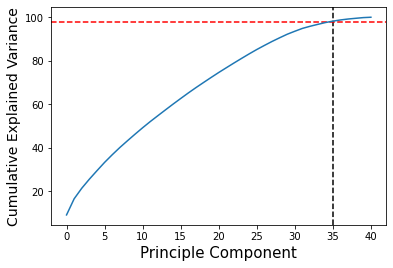

In [242]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(df_final_scale)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)

print("Number of component explained 98% variance : ",k)
plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

Only 35 features are very importent for modal building.

In [243]:
pca = PCA(n_components=35)

In [244]:
df_final_scale = pca.fit_transform(df_final_scale)


In [245]:
df_final_scale

array([[ 0.36272616,  2.28101934, -1.69526733, ..., -0.40716011,
        -0.04653347, -0.49645009],
       [ 0.69146971, -1.92097703,  1.73331698, ..., -0.61612604,
        -0.34314402,  0.07395008],
       [-1.46056229, -1.52392289,  0.18843922, ...,  0.58613168,
         0.48335252,  0.2590631 ],
       ...,
       [-2.2330878 , -1.00935849,  0.0458156 , ...,  0.13374229,
        -0.30569593,  0.13594887],
       [-0.63537951, -0.03650568, -1.0843995 , ...,  0.23606598,
        -0.57920482,  0.88915895],
       [-2.33075947,  0.75562936, -0.25212207, ...,  0.32215286,
        -0.73529462, -0.264053  ]])

# Modal building Proscess

In [246]:
from sklearn.metrics import accuracy_score, plot_roc_curve,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [264]:
def best_modal(mob):
    max_auc = 0
    max_state =0
    for i in range(21,101):
        x_train, x_test, y_train, y_test = train_test_split(df_final_scale,df_target,test_size=0.25, random_state = i)
        mob.fit(x_train, y_train)
        y_pred = mob.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_auc:
            max_auc = score
            max_state = i
    print("Best Accuracy Score corresponding ",max_state," is",max_auc)
    print("Cross Validation Score is : ",cross_val_score(mob,df_final_scale,df_target,cv=5).mean())
    print("Classification report is :\n",classification_report(y_test,y_pred))
    print("\n Confusion matrix is :\n",confusion_matrix(y_test,y_pred))
    print("\n Roc_Auc_Score is :\n",roc_auc_score(y_test,y_pred))

# Logistic classification

In [265]:
from sklearn.linear_model import LogisticRegression
log_clas = LogisticRegression()
best_modal(log_clas)

Best Accuracy Score corresponding  83  is 0.9165120593692022
Cross Validation Score is :  0.8720954713414109
Classification report is :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       303
           1       0.92      0.83      0.87       236

    accuracy                           0.89       539
   macro avg       0.90      0.89      0.89       539
weighted avg       0.90      0.89      0.89       539


 Confusion matrix is :
 [[287  16]
 [ 41 195]]

 Roc_Auc_Score is :
 0.8867329529563126


# Random forest classification

In [266]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
best_modal(rand_class)

Best Accuracy Score corresponding  93  is 0.9128014842300557
Cross Validation Score is :  0.8744339176763771
Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       303
           1       0.96      0.78      0.86       236

    accuracy                           0.89       539
   macro avg       0.91      0.88      0.89       539
weighted avg       0.90      0.89      0.89       539


 Confusion matrix is :
 [[296   7]
 [ 52 184]]

 Roc_Auc_Score is :
 0.8782793533590649


# Knn classification

In [267]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
best_modal(knn_class)

Best Accuracy Score corresponding  74  is 0.9090909090909091
Cross Validation Score is :  0.8887309873678783
Classification report is :
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       303
           1       0.85      0.86      0.86       236

    accuracy                           0.87       539
   macro avg       0.87      0.87      0.87       539
weighted avg       0.87      0.87      0.87       539


 Confusion matrix is :
 [[268  35]
 [ 33 203]]

 Roc_Auc_Score is :
 0.8723289701851542


# DecisionTreeClassification

In [268]:
from sklearn.tree import DecisionTreeClassifier
dtree_class = DecisionTreeClassifier()
best_modal(dtree_class)

Best Accuracy Score corresponding  86  is 0.8478664192949907
Cross Validation Score is :  0.8117663487153047
Classification report is :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       303
           1       0.78      0.77      0.78       236

    accuracy                           0.81       539
   macro avg       0.80      0.80      0.80       539
weighted avg       0.80      0.81      0.80       539


 Confusion matrix is :
 [[253  50]
 [ 55 181]]

 Roc_Auc_Score is :
 0.8009663254461039


# AdaBoostclassification

In [269]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier()
best_modal(ada_class)

Best Accuracy Score corresponding  48  is 0.8905380333951762
Cross Validation Score is :  0.8419330583483715
Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.87      0.79      0.83       236

    accuracy                           0.86       539
   macro avg       0.86      0.85      0.85       539
weighted avg       0.86      0.86      0.86       539


 Confusion matrix is :
 [[276  27]
 [ 50 186]]

 Roc_Auc_Score is :
 0.849513341164625


In [270]:
#plot roc_auc_curve
x_train,x_test,y_train,y_test = train_test_split(df_final_scale,df_target,random_state=83,test_size=0.25)

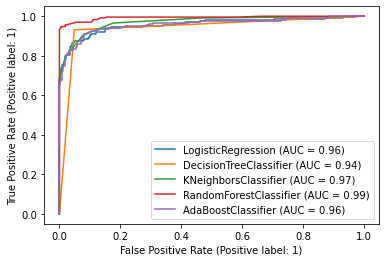

In [272]:
disp = plot_roc_curve(log_clas, x_test, y_test)
plot_roc_curve(dtree_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rand_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada_class,x_test,y_test,ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

# Final modal => Random forest classification

In [276]:
#now to improve accuracy score we have to use hyperperameter tune
from sklearn.model_selection import GridSearchCV
rand_class = RandomForestClassifier()
pera = {'n_estimators':[100,101],
         'criterion':['gini','entropy','log_loss'],
         'min_samples_split':[2,3],
         'min_samples_leaf':[1,2],
         'max_features':['sqrt','log2']}


In [277]:
grid_serch = GridSearchCV(estimator=rand_class,param_grid=pera,cv=3)

In [278]:
grid_serch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 101]})

In [279]:
#best estimator
grid_serch.best_estimator_

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_leaf=2, n_estimators=101)

In [280]:
#best Parameters
grid_serch.best_params_

{'criterion': 'log_loss',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 101}

In [281]:
#now build final modal
rand_class = RandomForestClassifier(n_estimators=101,criterion='log_loss',max_features='log2',min_samples_leaf=2,min_samples_split=2)
best_modal(rand_class)

Best Accuracy Score corresponding  48  is 0.9183673469387755
Cross Validation Score is :  0.8725799175045115
Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       303
           1       0.96      0.77      0.86       236

    accuracy                           0.89       539
   macro avg       0.90      0.87      0.88       539
weighted avg       0.90      0.89      0.88       539


 Confusion matrix is :
 [[296   7]
 [ 54 182]]

 Roc_Auc_Score is :
 0.8740420652234716


# Saving Modal

In [282]:
import joblib
joblib.dump(rand_class,'HR_Analytics_final.pkl')

['HR_Analytics_final.pkl']